UCGMIN01 Programming in Python 2024/2025, teacher: Volker Nannen

# Implementation of Dijkstra's shortest path algorithm

Also includes depth first search, breadth first search, and visualization of all roads searched

### Contents:

- Code to load countries, cities, and roads, which form a symmetric weighted graph
- Code to turn those data sets into an adjacency map
- Code to print a map of Europe and to visualize paths
- Code to find the shortest path with **depth-first**  search
- Code to find the shortest path with **breadth-first**  search
- Code to find the shortest path with **Dijkstra**'s shortest path algorithm



In [1]:
import os
#print(os.getcwd())

In [5]:
# from Chap03 Think Python

from os.path import basename, exists

def download(url):
    filename = basename(url)
    assert(isinstance(filename, str))
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');

#download('https://github.com/vnannen/ThinkPython/raw/v3/diagram.py');

import thinkpython

In [66]:
class Country:
    '''Country has the property name'''
    def __init__(self, name):
        self._name = name

    @property
    def name(self):
        return self._name

    def __str__(self):
        return self.name

    def __repr__(self):
        return f"Country(\"{self.name}\")"
    
with open(f"countries.py", 'r', encoding="utf8") as file:
    countries = eval(file.read())

In [67]:
class City:
    def __init__(self, name, country_index, gps=None):
        self._name = name
        self._country = country_index
        self._gps = gps
        self._degree = None

    @property
    def name(self):
        return self._name

    @property
    def country(self):
        return self._country
    
    @property
    def degree(self):
        return self._degree
    
    @degree.setter
    def degree(self, value):
        if value > 0:
            self._degree = value
    
    @property
    def latitude(self):
        return self._gps[0]
        
    @property
    def longitude(self):
        return self._gps[1]
    
    @property
    def gps(self):
        return self._gps

    def __str__(self):
        if 'countries' in locals() or 'countries' in globals():
            return f"{self.name}, {countries[self._country]}"
        else:
            return f"{self.name}"

    def __repr__(self):
        return f"City(\"{self.name}\", {self._country}, {self.gps})"
    
with open(f"cities_gps.py", 'r', encoding="utf8") as file:
    cities = eval(file.read())

In [68]:
class Road:
    '''Road has the properties int a and int b,
    the indices of the city in a companion list of cities,
    and a property distance in km''' 
    def __init__(self, city_a, city_b, distance):
        if city_a < city_b:
            self._city_a = city_a
            self._city_b = city_b
        else:
            self._city_a = city_b
            self._city_b = city_a
        self._distance = distance        

    @property
    def a(self):
        return self._city_a
    
    @property
    def b(self):
        return self._city_b

    @property
    def distance(self):
        return self._distance
        
    def __str__(self):
        if 'cities' in locals() or 'cities' in globals():
            return (f"({self._city_a}, {self._city_b}), {cities[self._city_a]} <-> "
                    f"{cities[self._city_b]}; distance {self._distance}")
        else:
            return (f"({self._city_a}, {self._city_b}); distance {self._distance}")
    
    def __repr__(self):
        return f"Road({self._city_a}, {self._city_b}, {self._distance})"

    def __eq__(self, other):
        equal = (type(other) == Road and
                ((self._city_a == other._city_a
                    and self._city_b == other._city_b)
                or (self._city_a == other._city_b
                    and self._city_b == other._city_a)))
        
    def __lt__(self, other):
        return self._distance < other._distance
    
    
#with open(f"roads_iberia.py", 'r') as file:
with open(f"roads_europe.py", 'r', encoding="utf8") as file:
    roads = eval(file.read())

### Adjacency map
Our road network forms a symmetric weighted graph. The distances are the weights.

`adjacency_map[road.a][road.b] = road.distance and
adjacency_map[road.b][road.a] = road.distance`

In [69]:
def create_map(roads):
    adjacency_map = {}
    for r in roads:
        if not r.a in adjacency_map:
            adjacency_map[r.a] = {}
        adjacency_map[r.a][r.b] = r.distance
        if not r.b in adjacency_map:
            adjacency_map[r.b] = {}
        adjacency_map[r.b][r.a] = r.distance
    return adjacency_map

def verify_map(roads, adjacency_map):
    success = True
    for road in roads:
        if (not road.a in adjacency_map or not road.b in adjacency_map or
            not road.a in adjacency_map[road.b] or not road.b in adjacency_map[road.a]):
            print("problem with indices of road " + str(road))
            success = False
        if (not road.distance == adjacency_map[road.a][road.b] or 
            not road.distance == adjacency_map[road.b][road.a]):
            print("problem with distance of road " + str(road))
            success = False
    if success:
        print("verification successful")
    else:
        print("verification FAILED")

adjacency_map = create_map(roads)

verify_map(roads, adjacency_map)

verification successful


To use the following code, you need to install the basemap package in your command line interface: 

```conda install basemap```

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap # don't forget to install basemap in conda

# Basic map of Europe
def create_europe_map(
        lower_lat=35, # sourthern latitude of Irakleion, Crete
        upper_lat=65.1, # northern latitude of Oulu, Finland
        lower_lon=-10, # western longigtude of Ireland
        upper_lon=40 # eastern longitude Ukraine
        ):
    # Set up Basemap for Europe (using Mercator projection)
    europe_map = Basemap(
        projection='merc', 
        llcrnrlat=lower_lat, urcrnrlat=upper_lat,   
        llcrnrlon=lower_lon, urcrnrlon=upper_lon,  
        resolution='i'
    )

    # Draw countries, coastlines, and boundaries
    europe_map.drawcountries()
    europe_map.drawcoastlines()
    europe_map.drawmapboundary(fill_color='aqua')
    europe_map.fillcontinents(color='white', lake_color='aqua')

    return europe_map

# draw cities and roads on the map
def gps_to_xy(gps, geo_map):
    """Converts latitude and longitude to horizontal x and vertical y coordinates."""
    x, y = geo_map(gps[1], gps[0]) # Basemap reverses the order
    return x, y 

def mark_city(city, geo_map):
    '''mark city with blue dot'''
    x, y = gps_to_xy(city.gps, geo_map)
    plt.plot(x, y, 'bo', markersize=.5)

def label_city(city, geo_map):
    '''add city name to map'''
    x, y = gps_to_xy(city.gps, geo_map)
    plt.text(x, y, f' {city.name}', fontsize=4)

def mark_road(city_a, city_b, geo_map):
    '''mark road with red line'''
    x1, y1 = gps_to_xy(city_a.gps, geo_map)
    x2, y2 = gps_to_xy(city_b.gps, geo_map)
    plt.plot([x1, x2], [y1, y2], 'r-', markersize=.5)  

def print_path(path):
    plt.figure(figsize=(18, 18)) # change this to fit your screen

    # finding the bounding box in degrees so that the path covers 
    # a large part of the printed map
    margin = 2 # the margin in degrees around the path
    upper_lat = 35 # sourthern latitude of Irakleion, Crete
    lower_lat = 65.1 # northern latitude of Oulu, Finland
    upper_lon = -10 # western longigtude of Ireland
    lower_lon = 40 # eastern longitude Ukraine
    for p in path:
        lower_lat = min(lower_lat, cities[p].latitude - margin)
        upper_lat = max(upper_lat, cities[p].latitude + margin)
        lower_lon = min(lower_lon, cities[p].longitude - margin)
        upper_lon = max(upper_lon, cities[p].longitude + margin)

    europe_map = create_europe_map(lower_lat, upper_lat, lower_lon, upper_lon)
#    europe_map = create_europe_map()
    for p in path:
        # the intention is to have the city labels in the background and paint the
        # roads on top of them, but that doesn't seem to work.
        label_city(cities[p], europe_map)
    for i in range(len(path)-1):
        a = cities[path[i]]
        b = cities[path[i+1]]
        mark_road(a,b, europe_map)
    for p in path:
        mark_city(cities[p], europe_map) 

    plt.title(f"Path from {cities[path[0]].name}, {countries[cities[path[0]].country]}, to {cities[path[-1]].name}, {countries[cities[path[-1]].country]}")
    plt.show()

def path_length(path, my_map):
    length = 0
    for i in range(len(path)-1):
        length += my_map[path[i]][path[i+1]]
    return length


In [71]:
### code to print a path and show all roads visited during the search
 
import numpy as np

def print_path_and_visited(path, visited):
    plt.figure(figsize=(18, 18)) # change this to fit your screen

    europe_map = create_europe_map()

    # 'autumn' is a predefined color spectrum, there are many others
    cmap = plt.get_cmap('summer') 
    # distributes the color spectrum over len(visited) steps
    colors = [cmap(i / (len(visited) - 1)) for i in range(len(visited))]

    color_counter = 0
    for a, b in visited:
        x1, y1 = gps_to_xy(cities[a].gps, europe_map)
        x2, y2 = gps_to_xy(cities[b].gps, europe_map)
        plt.plot([x1, x2], [y1, y2], '-', 
                 color=colors[color_counter], markersize=.5) 
        color_counter += 1

    for p in path:
        label_city(cities[p], europe_map)
    for i in range(len(path)-1):
        mark_road(cities[path[i]],cities[path[i+1]], europe_map)
    for p in path:
        mark_city(cities[p], europe_map) 

    plt.title(f"Path from {cities[path[0]]} to {cities[path[-1]]} in red; other visited roads in other colors")

    print("path length in km: " + str(path_length(path, adjacency_map)))
    print("path length in number of nodes: " + str(len(path)))
    # symmetries don't count
    visited = {(min(a, b), max(a, b)) for a, b in visited} 
    print(f"number of roads looked at: {len(set(visited))}")

    plt.show()   

## Depth-first seach

Search a possible path between any two cities **a** and **b** by using depth-first search with Taboo-list.

To create the algorithm, start by adding the head **a** to the path.

Then, extend the path by choosing a random neighbor of **a** and a random neighbor of that neighbor, and so on, with the following restrictions:

- do not add a neighbor that is already on the current path.
- do not add a neighbor that is in the Taboo-list (which is initially empty).

When you hit a dead end without finding **b** **backtrack** along the existing path. Starting at the current tail, each city on the path that does not have a neighbor that is not itself part of the path and that is not in the Taboo-list is deleted from the path and added to the Taboo list, until you find a city that has an as of yet unexplored neighbor. Now, extend the path by adding neighbors as before.

In [72]:
def find_path_depth_first(a, b):
    '''finds a path from a to b with depth first search'''
    
    taboo = set()
    path = [a]
    visited = [] # added for the visualization

    # terminate when there is no path
    while len(path) > 0:

        tail = path[-1]

        # unless we can continue, we are a dead end
        dead_end = True

        for k in adjacency_map[tail]:
            if not k in taboo and not k in path:
                visited.append((tail, k))
                path.append(k)
                if k == b:
                    print("found path")
                    return path, visited
                dead_end = False # we can continue, after all
                break

        if dead_end: # we hit a dead end
            taboo.add(tail)
            path.pop() # backtrack
            
    print("no path exists")
    return path, visited

found path
path length in km: 4951.0
path length in number of nodes: 61
number of roads looked at: 717


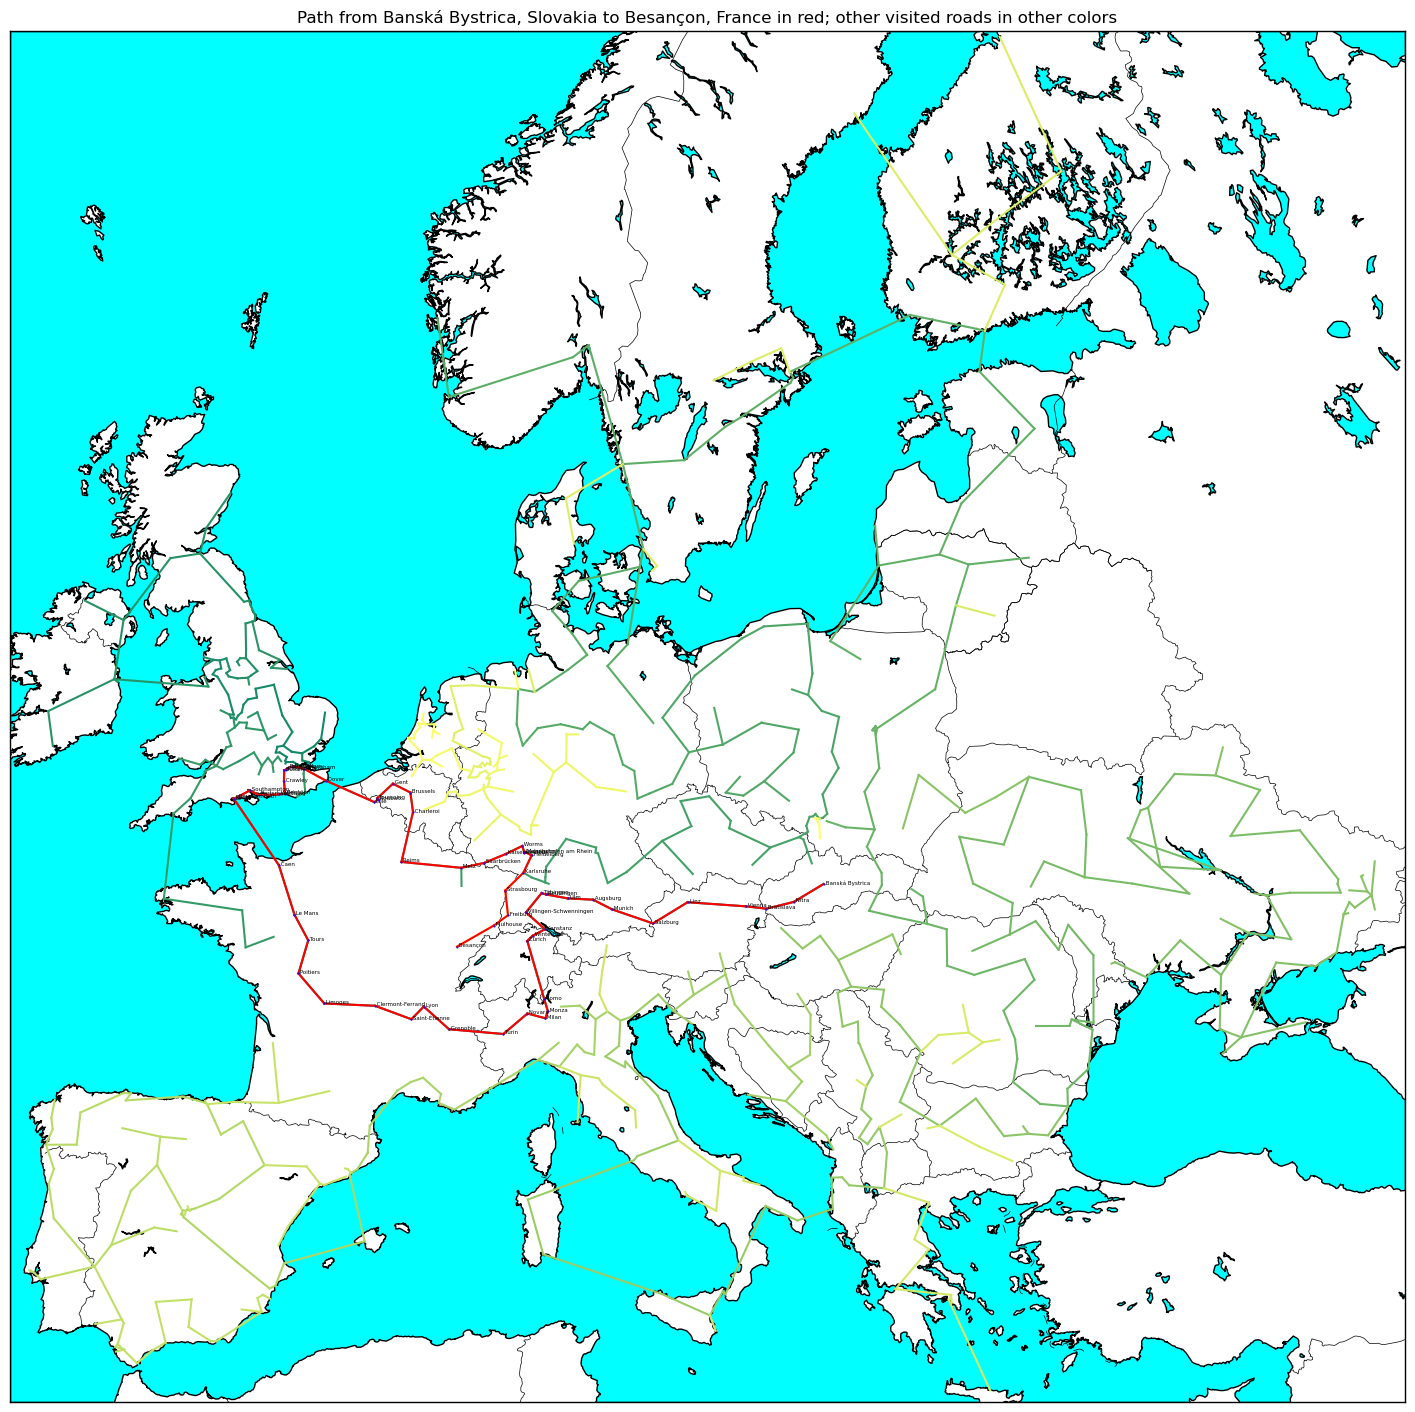

In [73]:
path, visited = find_path_depth_first(41,63)

print_path_and_visited(path, visited)

# Breadth-first search

Again, we search for a path from city **a** to city **b**.

Cities (nodes) that are directly connected to the origin a are first-degree neighbors of **a**. Cities that are neighbors of first-degree neighbors are second degree neighbors of **a**, and so on. For the purpose of this exercise, you can only be an n-degree neighbor if you are not also an (n-1)-degree neighbor or an (n-2)-degree neighbor and so on, to avoid dealing with loops. (We will use a taboo-list to avoid loops). We call each set of n-degree neighbors a shell: the origin itself is in shell 0, the first degree neighbors are in shell 1, and so on.

With this understanding, breadth-first first checks whether **b** is a first degree neighbor of **a** If it isn't, it checks whether **b** is a second degree neighbor of **a**, and so on.

#### Priors and paths: 
In depth-first, we grow and shrink a single path and this is what we return at the end. In breadth-first, every city in every shell has its own path. Every time we add a city **y** to shell n, we do so because **y** is a neighbor of city **x** in shell n-1 and because **y** is not a member of any other shell (we know that because we will keep a taboo-list). So, because there is a rather short path of length n from **a** to **x** we know that there is also a rather short path of length n+1 from **a** to **y**. **x** is a prior of **y**.

We keep track of all priors with a dictionary **priors** that records for each city how we got there. When we find the destination, we use the priors to construct a reverse path from destination to origin and reversed it with the ```path[::-1]``` statement.

In [74]:
def find_path_breath_first(a, b, adjacency_map):
    '''finds a short path by breadth first search'''

    visited = []   # added for visualization

    old_shell = [a]
    # to avoid processing a city multiple times
    taboo = {a}
    # priors allow us to reconstruct the path
    priors = {a: None} 
    
    # we loop over shells as long as they are not empty
    while len(old_shell)>0: 

        new_shell = [] # a new shell for every while-loop

        for city in old_shell:
                
            if city == b: # we found the destination
                # reconstruct the path
                path = [b]
                prior = priors[b]

                # the prior of the origin is None
                while prior is not None:
                    path.append(prior)
                    prior = priors[prior]

                # return inverted path
                return path[::-1], visited 
            
            for neighbor in adjacency_map[city]:

                # for visualization
                visited.append((city, neighbor)) 
                
                if not neighbor in taboo:
                    taboo.add(neighbor)
                    priors[neighbor] = city
                    new_shell.append(neighbor)

        old_shell = new_shell

    print("no path found")
    return None, visited

found!
ok
path length in km: 1338.0
path length in number of nodes: 15
number of roads looked at: 284


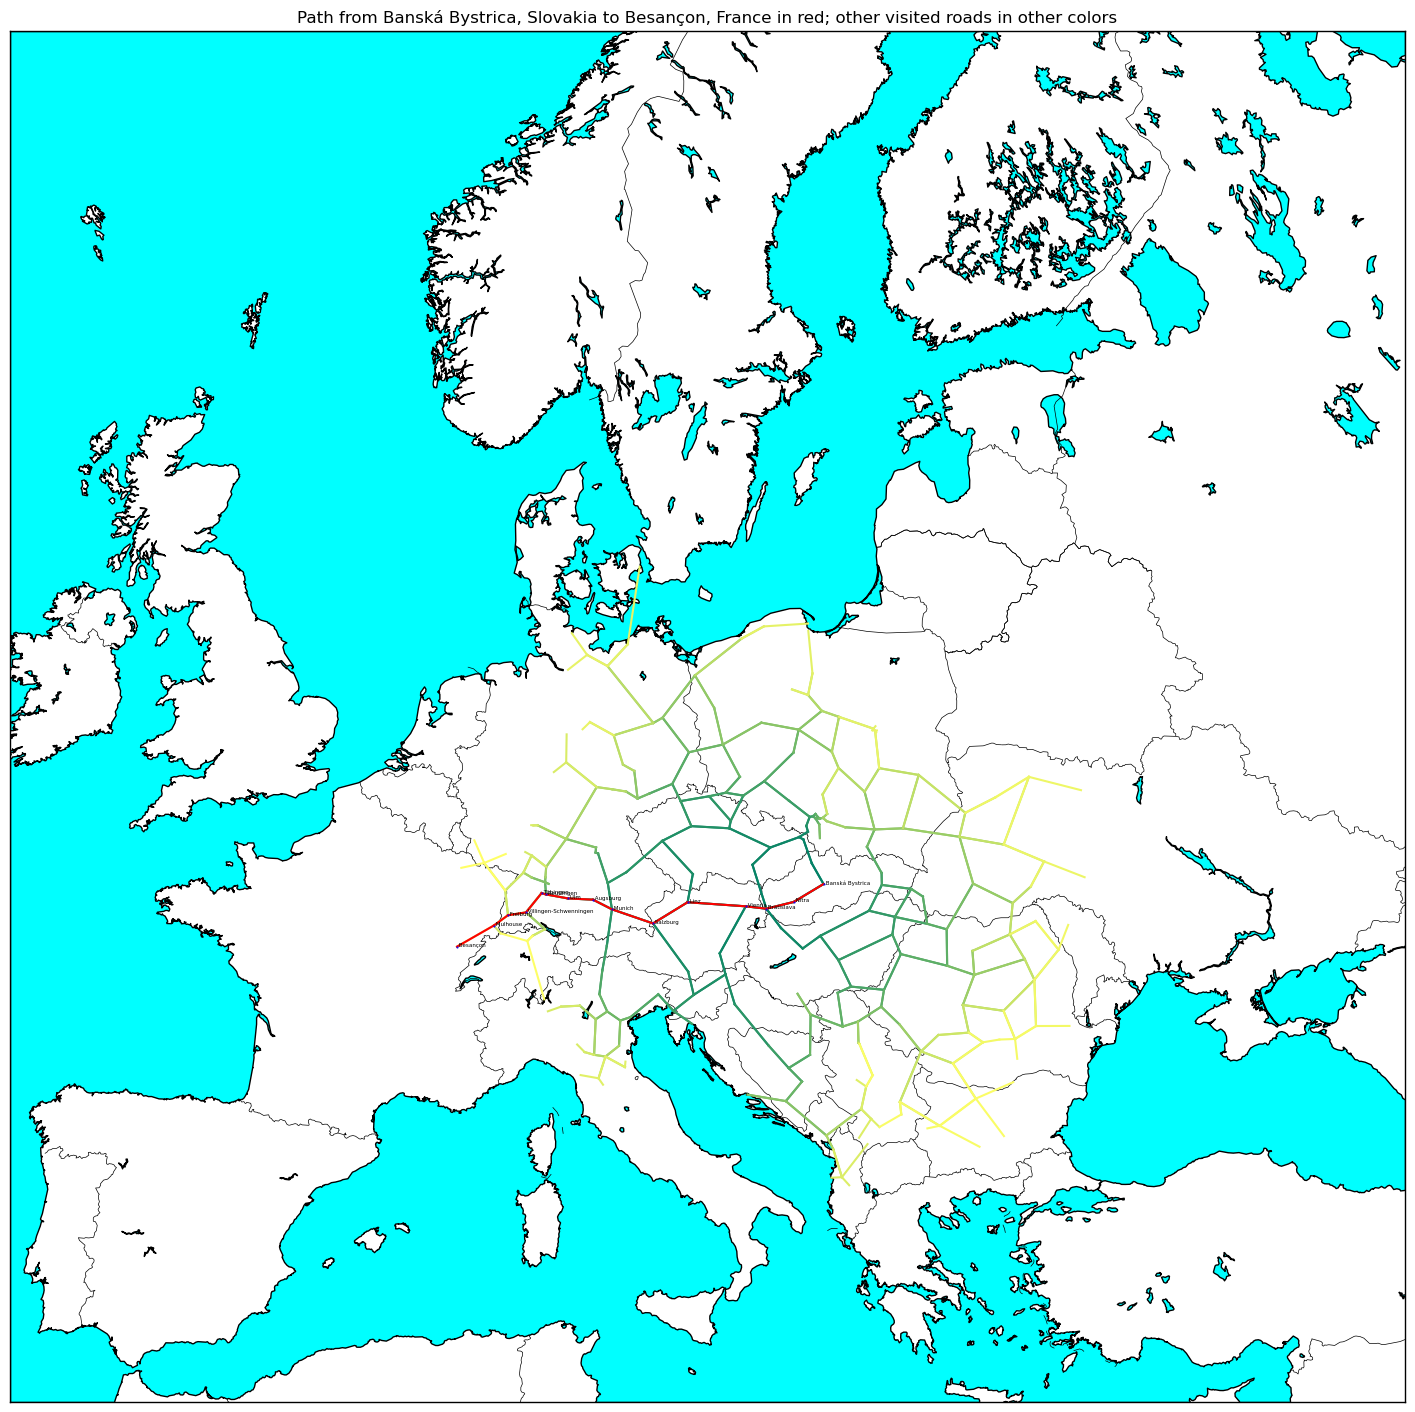

In [75]:
path, visited = find_path_breath_first(41,63, adjacency_map)

print("ok")

print_path_and_visited(path, visited)

# Dijkstra's shortest path algorithm

Again, we search for a path from city **a** to city **b**.

Because breadth-first expands the search frontier shell by shell, it finds the shortest path in an unweighted graph but not in a weighted graph. In a weighted graph, a long path through only a few nodes will beat a short path through many nodes.

So, instead of expanding the search frontier by distance counted in nodes regardless of distance, Dijkstra's algorithm expands the frontier by only adding neighbors of cities that are at minimal distance from the origin, and processes the cities in the frontier in their order of distance from the origin.

For this, we replace the **shell** of breadth-first by a data structure **frontier** which is continuously growing and shrinking. It is efficiently managed as a priority queue by Python's heapq module.

As with breadth-first, each city has a unique path. For each city **x** we process, we record the prior that led to **x**, which by virtue of the priority list must be on the shortest path to **x**. We construct the shortest path from **a** to **b** from the priors.

In [76]:
# This implementation uses a priority queue based on a heap structure
# furhter down you will also find an implementation that continuously 
# sorts the frontier.

import heapq # for the priority queue

def find_path_dijkstra(a, b, adjacency_map):
    '''finds the shortest path with Dijkstra's algorithm'''

    taboo = [] 
    visited = [] # added for visualization
    priors = {} # to reconstruct the path

    # The frontier is a list filled with 3-tuples: 
    # (distance, city, prior on path to city).
    # Distance is the first element of the tuplet because the priority 
    # list needs that for sorting. 

    # The first element of frontier is a distance 0 from a and no prior.
    frontier = [(0, a, None)] 

    # if len(frontier)==0 then there is no path from a to b
    while len(frontier) > 0: 

        # Since frontier is a list of 3-tuples, we can use a comma separated list
        # to assign three variables to the three elements of each tuple. This is 
        # more readable than doing current = heapq.heappop(frontier) and then  
        # working with current[0], current[1], current[2]
        current_distance, current_city, current_prior = heapq.heappop(frontier)

        # If a city x can be reached by multiples paths/distances, x will enter
        # the frontier multiple times and will pop multiple times. 
        #
        # The priority list guarantees that heapq.heappop() pops the tuple of x
        # with the shortest distance to the origin first. 
        #
        # Any neighbors of x that are then added to the frontier will have their
        # distance to the origin calculated based on this shortest distance.
        #
        # During processing, x is added to the taboo list, to avoid processing it 
        # again with a longer distance.

        if current_city not in taboo: 

            # Since current_city is not in taboo, this is the first time we look at
            # it. Because it had the highest priority, current_path is the SHORTEST
            # distance between the origin and current_city and current_prior is the
            # prior on the shortest path.

            priors[current_city] = current_prior

            taboo.append(current_city) 

            if b == current_city:            
                path = [b]
                prior = priors[b]
                while prior: # terminates when prior is None
                    path.append(prior)
                    prior = priors[prior]
                return path[::-1], visited # current_path is the path from a to b
            
            for neighbor, neighbor_distance in adjacency_map[current_city].items():
                visited.append((current_city, neighbor)) # for visualization
                if not neighbor in taboo:
                    new_distance = current_distance + neighbor_distance
                    # heapq.heappush makes sure that when adding an element to
                    # frontier, the heap property is preserved.
                    heapq.heappush(frontier, 
                                   (new_distance, neighbor, current_city))

    return None, visited

path length in km: 1338.0
path length in number of nodes: 15
number of roads looked at: 343


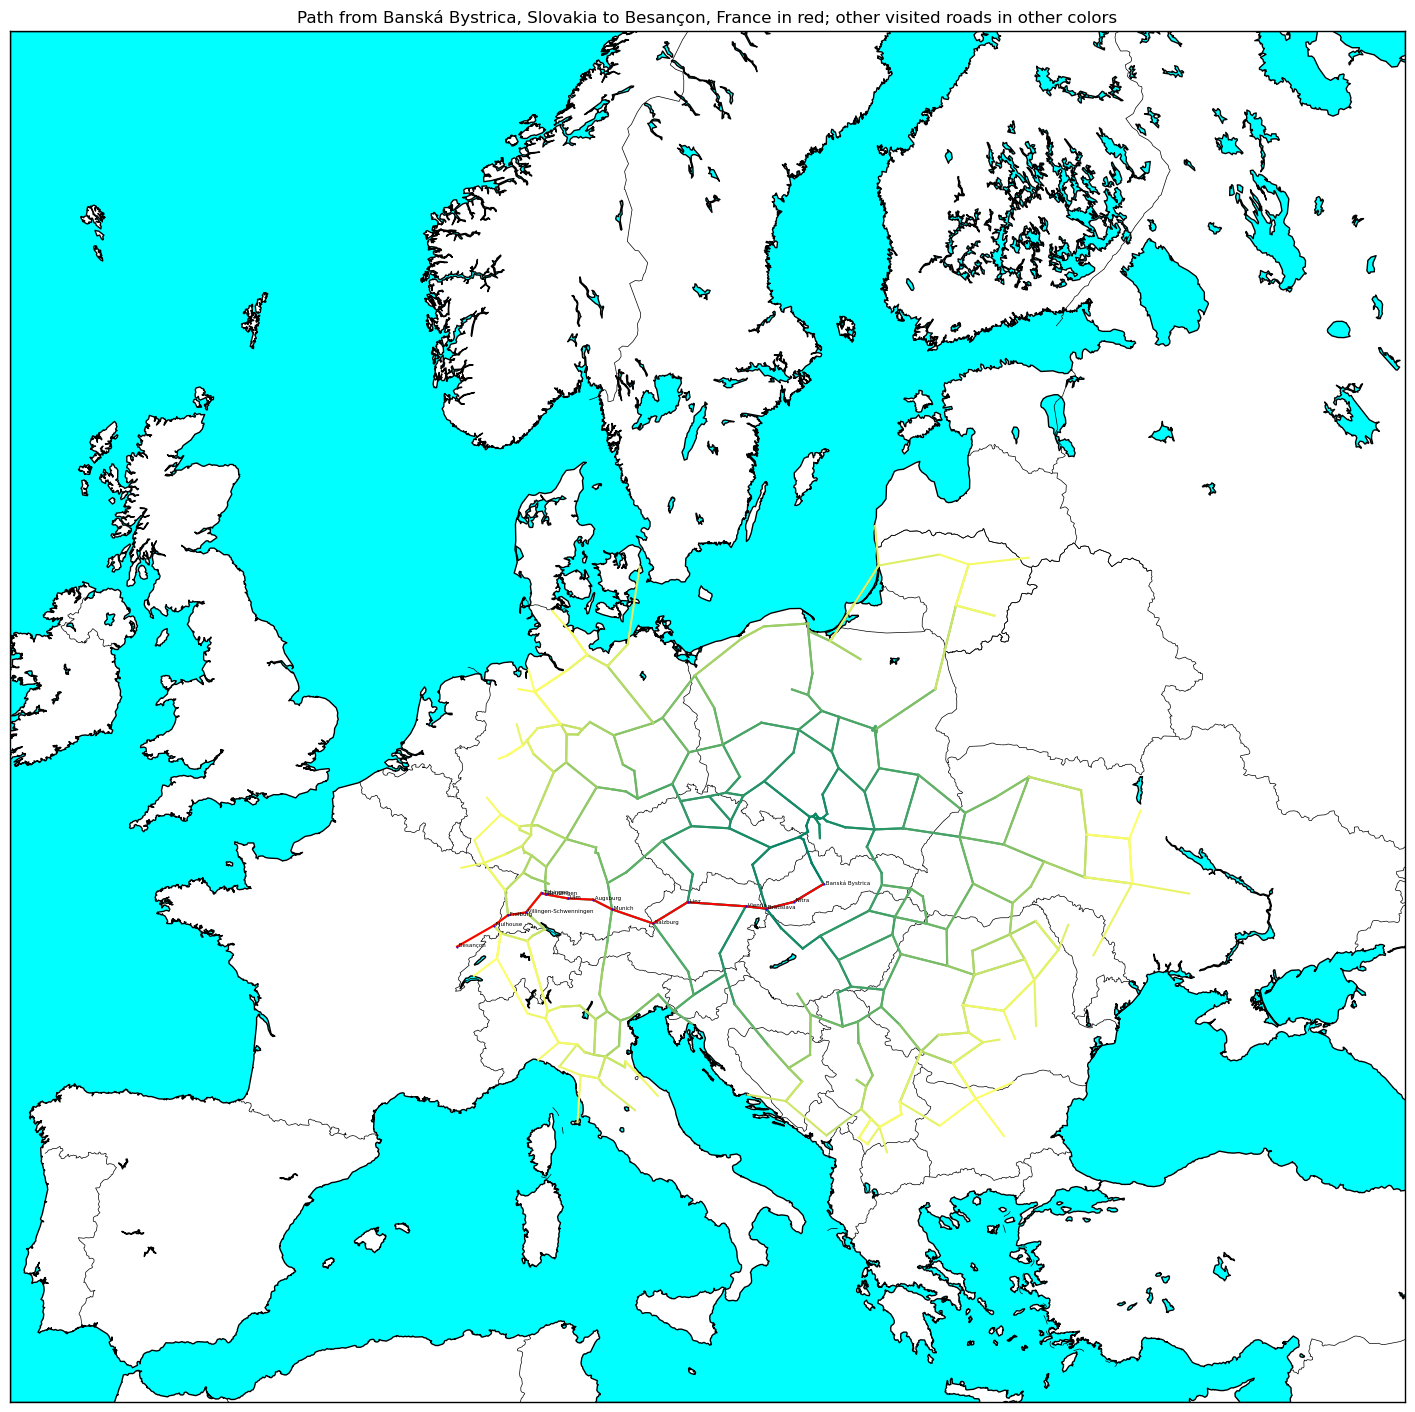

In [77]:
path, visited = find_path_dijkstra(41,63,adjacency_map)

print_path_and_visited(path, visited)

In [78]:
# This implementation continuously sorts the frontier. 
# Further up you find an implementation the uses a priority queue
# / heap structure.

def find_path_dijkstra_sorted(a, b, adjacency_map):
    '''finds the shortest path with Dijkstra's algorithm'''

    taboo = [] 
    visited = [] # added for visualization
    priors = {} # to reconstruct the path

    # The frontier is a list filled with 3-tuples: 
    # (distance, city, prior on path to city).
    # Distance is the first element of the tuplet because the priority 
    # list needs that for sorting. 

    # The first element of frontier is a distance 0 from a and no prior.
    frontier = [(0, a, None)] 

    # if len(frontier)==0 then there is no path from a to b
    while len(frontier) > 0: 

        # Since frontier is a list of 3-tuples, we can use a comma separated list
        # to assign three variables to the three elements of each tuple. This is 
        # more readable than doing current = heapq.heappop(frontier) and then  
        # working with current[0], current[1], current[2]
        frontier = sorted(frontier, reverse=True)
        current_distance, current_city, current_prior = frontier.pop()

        # If a city x can be reached by multiples paths/distances, x will enter
        # the frontier multiple times and will pop multiple times. 
        #
        # The priority list guarantees that heapq.heappop() pops the tuple of x
        # with the shortest distance to the origin first. 
        #
        # Any neighbors of x that are then added to the frontier will have their
        # distance to the origin calculated based on this shortest distance.
        #
        # During processing, x is added to the taboo list, to avoid processing it 
        # again with a longer distance.

        if current_city not in taboo: 

            # Since current_city is not in taboo, this is the first time we look at
            # it. Because it had the highest priority, current_path is the SHORTEST
            # distance between the origin and current_city and current_prior is the
            # prior on the shortest path.

            priors[current_city] = current_prior

            taboo.append(current_city) 

            if b == current_city:            
                path = [b]
                prior = priors[b]
                while prior: # terminates when prior is None
                    path.append(prior)
                    prior = priors[prior]
                return path[::-1], visited # current_path is the path from a to b
            
            for neighbor, neighbor_distance in adjacency_map[current_city].items():
                visited.append((current_city, neighbor)) # for visualization
                if not neighbor in taboo:
                    new_distance = current_distance + neighbor_distance
                    # heapq.heappush makes sure that when adding an element to
                    # frontier, the heap property is preserved.
                    frontier.append((new_distance, neighbor, current_city))

    return None, visited

path length in km: 1338.0
path length in number of nodes: 15
number of roads looked at: 343


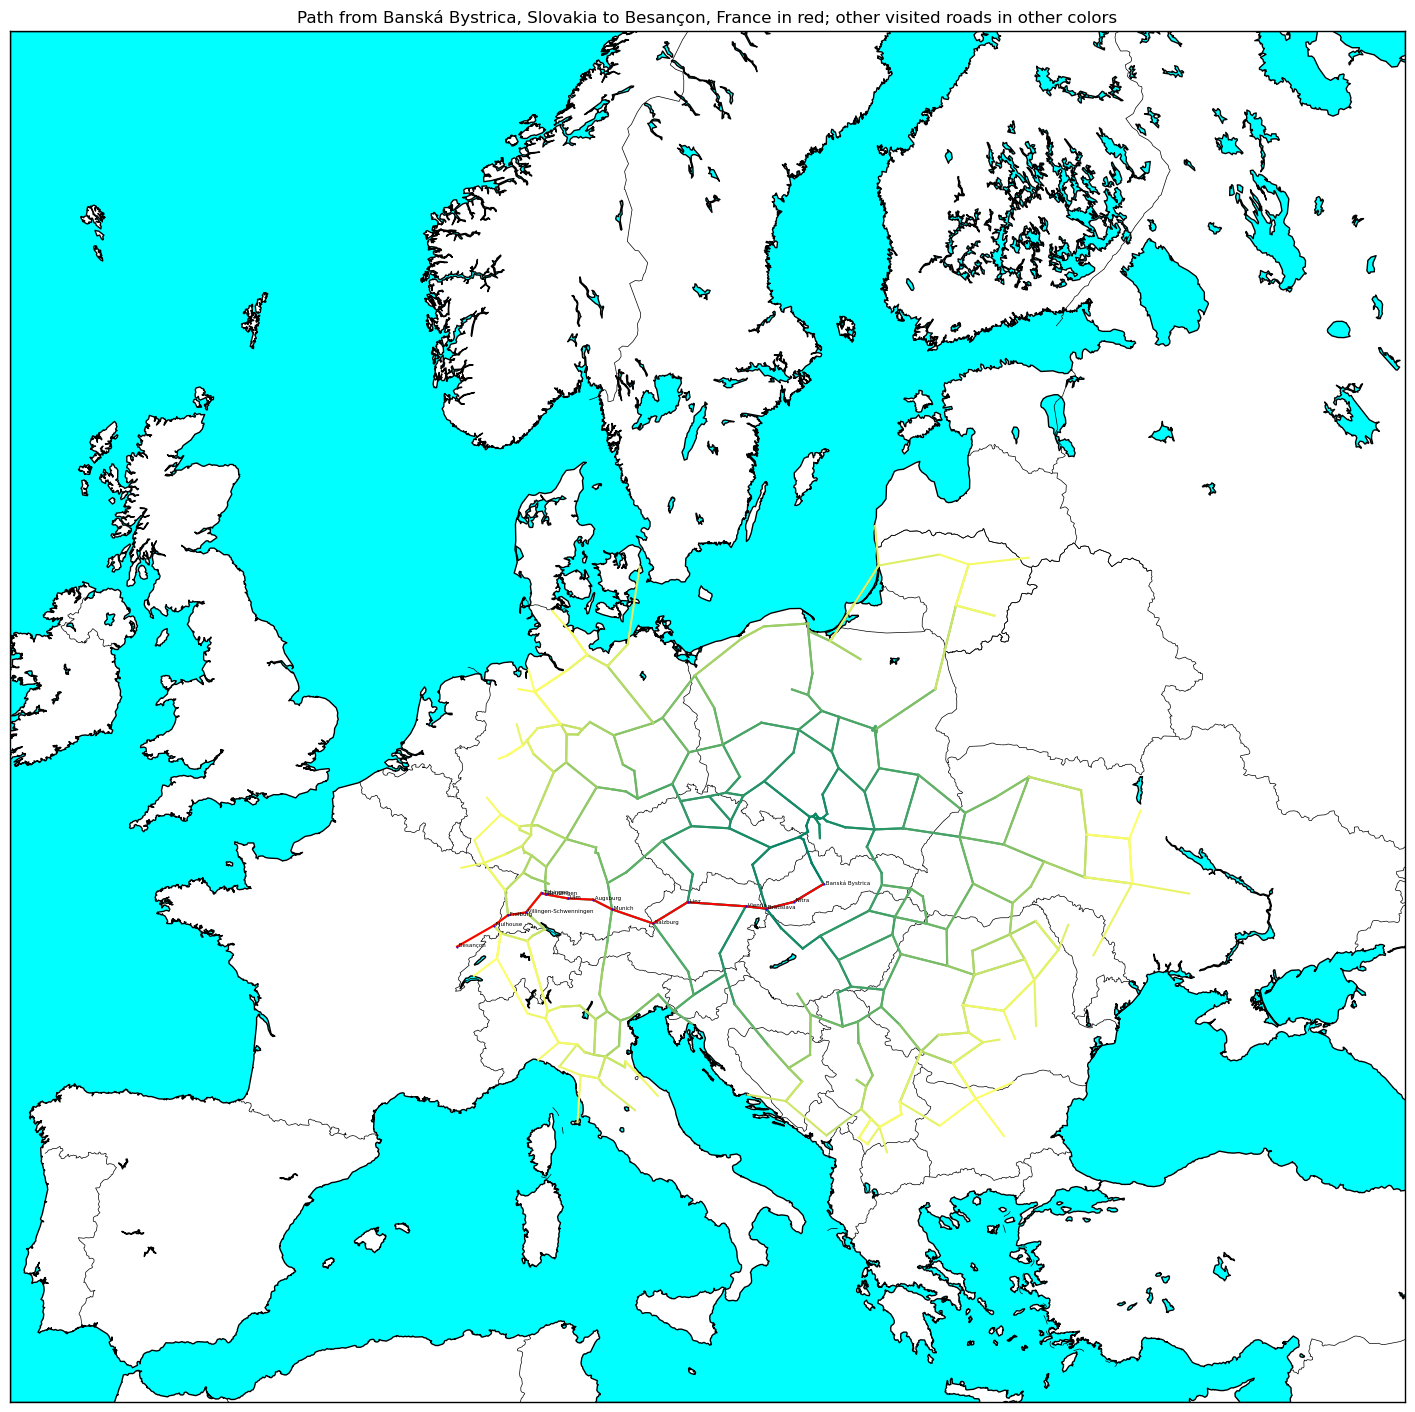

In [79]:
path, visited = find_path_dijkstra_sorted(41,63,adjacency_map)

print_path_and_visited(path, visited)